This first chunk of code displays the graphs of part A: (currently commented out since it's kind of annoying)

In [7]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


part_a_df = pd.read_csv('MechanicsCoffeeFilterLab.csv')

for i in range(1,11):

    graph_1 = part_a_df[[f'Time (s) Run #{i}',f'Position (m) Run #{i}']].dropna()
    
    #graph_1.plot(kind='line')


This next code chunk displays the graphs with the end chopped off for part A:

In [8]:
pd.options.display.max_rows = 100

# find end, the height min height for all are about the same, 0.13, so find closest value and make this the end

for i in range(1,11):

    graph_1 = part_a_df[[f'Time (s) Run #{i}',f'Position (m) Run #{i}']].dropna()

    start = 0

    done = False
    j = 0
    while not done:
        num = graph_1[f'Position (m) Run #{i}'].iloc[j]
        j += 1
        if num <= 0.13:
            end = j
            done = True

    graph_1 = graph_1.loc[0:j-1]
    #graph_1.plot()

This next code chunk displays the graphs after being fully cleaned for part A:

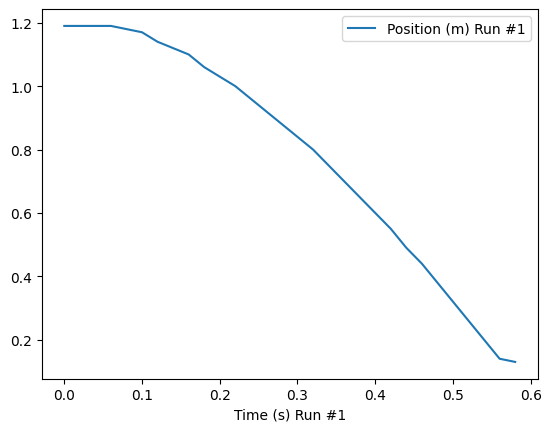

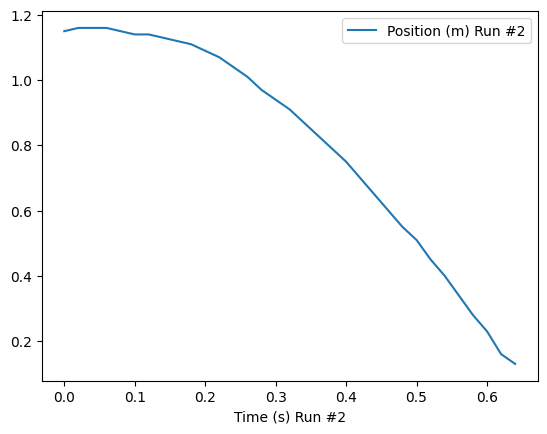

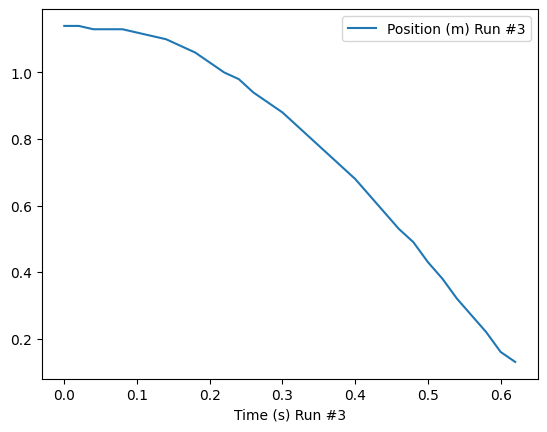

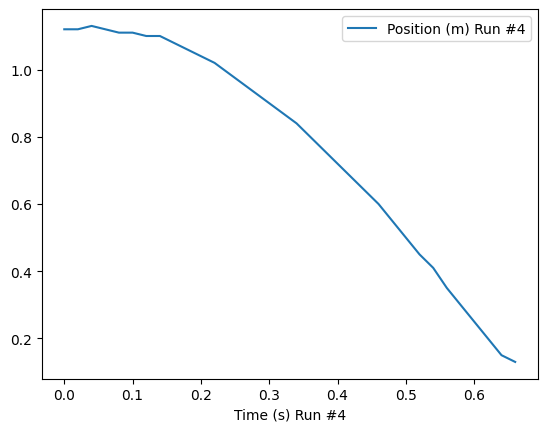

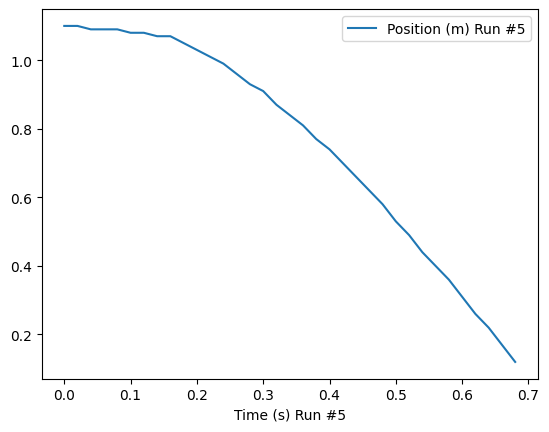

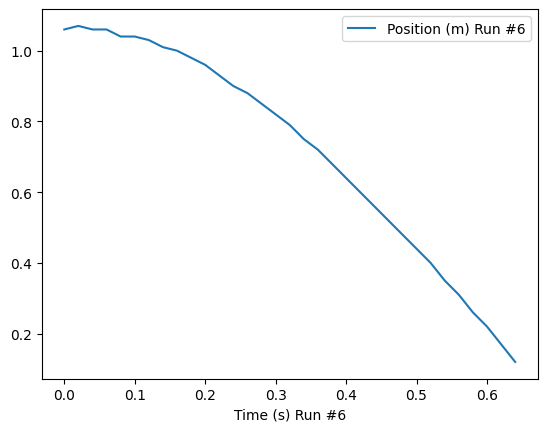

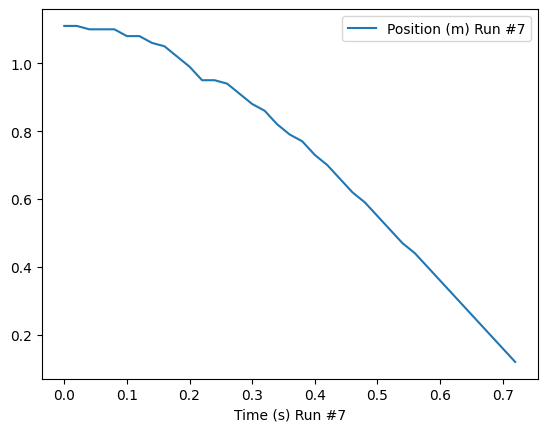

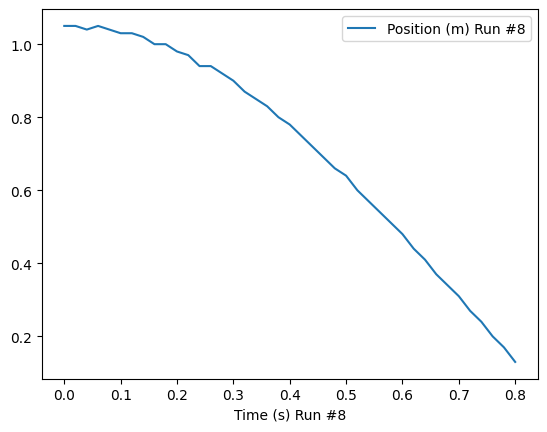

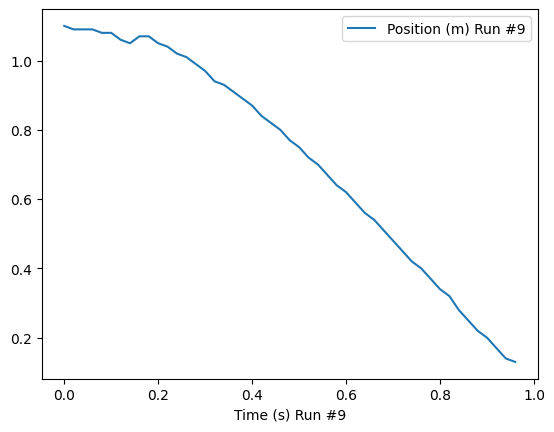

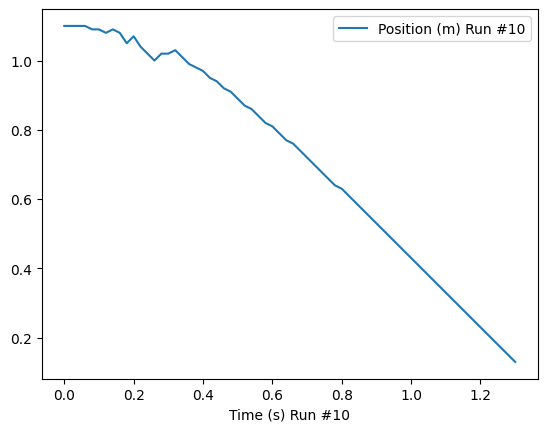

In [ ]:
runs_a = []

for i in range(1,11):
    graph_1 = part_a_df[[f'Time (s) Run #{i}',f'Position (m) Run #{i}']].dropna()
    
    start = 0
    done = False
    j = 0

    while not done:
        num = graph_1[f'Position (m) Run #{i}'].iloc[j]
        j += 1
        if num <= 0.13:
            end = j
            done = True

    graph_1 = graph_1.loc[0:j-1]
    
    # Now work backwards, if 5 consecutive values are about the same, make this plateau the beginning of graph
    
    j = len(graph_1)
    done = False
    
    while not done:
        if j == 5:
            start = 0
            done = True
        else:
            nums = list(graph_1[f'Position (m) Run #{i}'].iloc[j-5:j])
            if nums[0] - nums[4] == 0:
                start = j-4
                done = True
            j -= 1

    graph_1 = graph_1[start:]


    # Sets time to start from zero
    new_times = {f'Time (s) Run #{i}': []}
    index_column = graph_1.reset_index()[f'Time (s) Run #{i}']
    for time in index_column:
        new_times[f'Time (s) Run #{i}'].append(float(round(time - index_column.iloc[0],2)))
    
    graph_1 = graph_1.drop(f'Time (s) Run #{i}',axis = 'columns')
    graph_1.reset_index(inplace=True,drop = True)
    graph_1 = graph_1.merge(pd.DataFrame(new_times),left_index=True,right_index=True)
    
    graph_1 = graph_1.set_index(f'Time (s) Run #{i}')
    
    runs_a.append(graph_1)
    graph_1.plot()



Part B setup / untouched graphs: (Still commented out like before)

In [33]:
part_b_df = pd.read_csv('MechanicsCoffeeFilterLab2.csv')

for i in range(1,11):

    graph_2 = part_b_df[[f'Time (s) Run #{i}',f'Position (m) Run #{i}']].dropna()
    #graph_2.plot(kind='line')


Next code chunk shows the graph fully cleaned for B: (both start and end are chopped off in this one chunk)

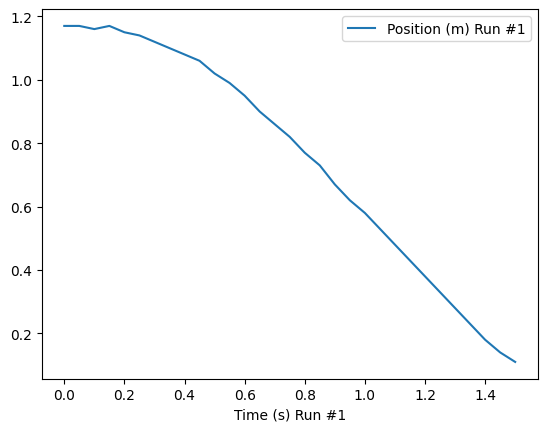

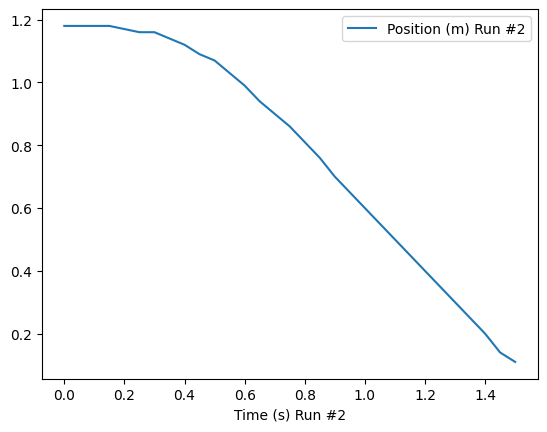

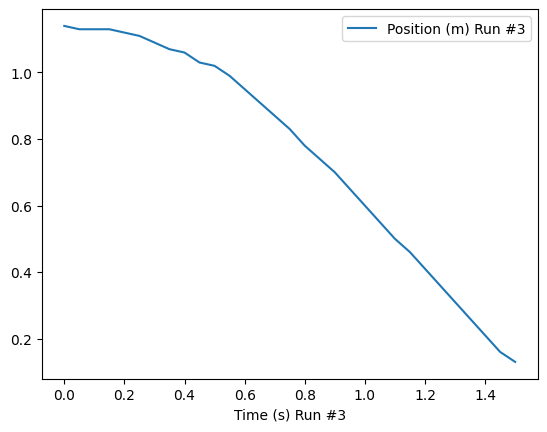

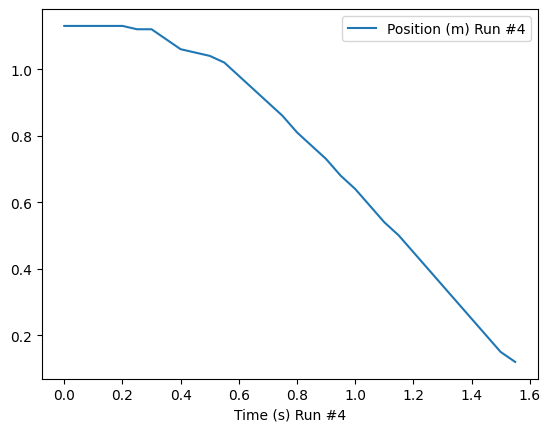

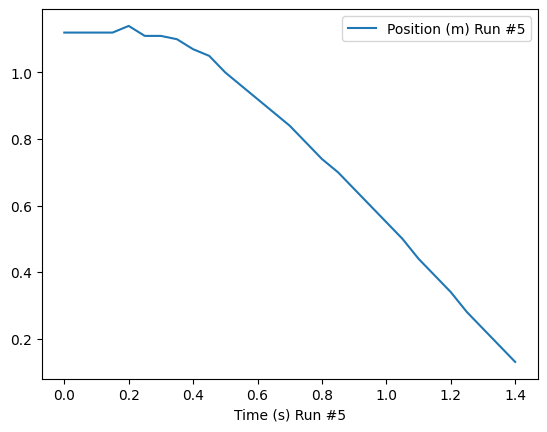

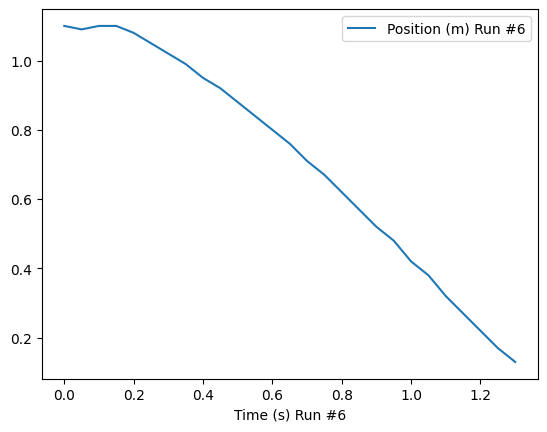

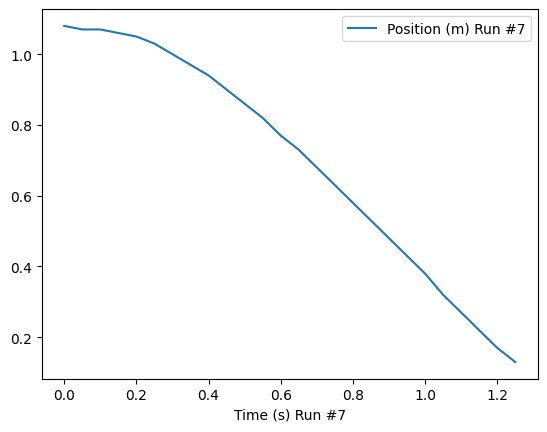

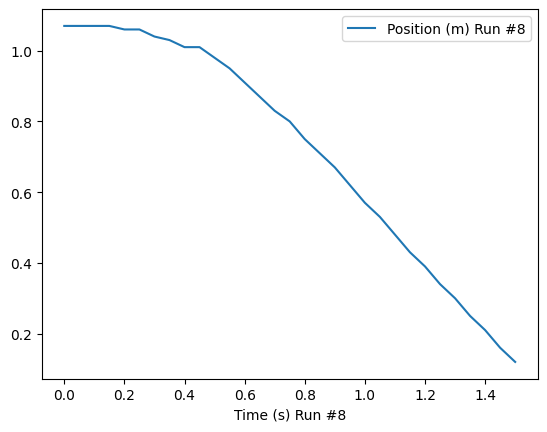

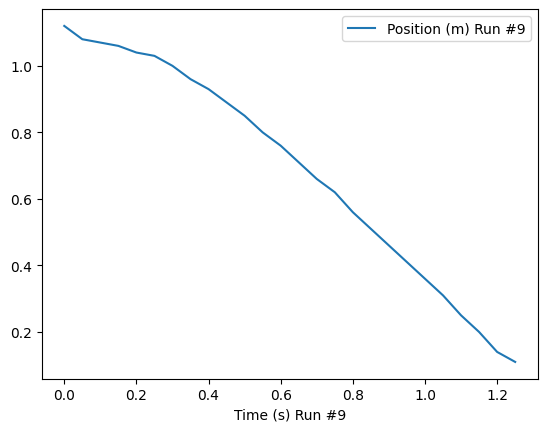

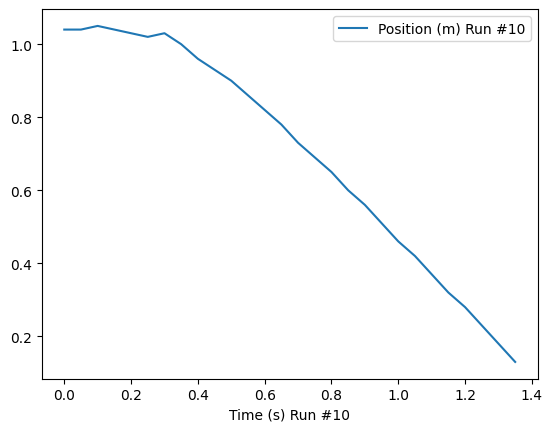

In [37]:
runs_b = []

for i in range(1,11):
    graph_2 = part_b_df[[f'Time (s) Run #{i}',f'Position (m) Run #{i}']].dropna()
    
    start = 0
    done = False
    j = 0

    while not done:
        num = graph_2[f'Position (m) Run #{i}'].iloc[j]
        j += 1
        if num <= 0.13:
            end = j
            done = True

    graph_2 = graph_2.loc[0:j-1]
    
    # Now work backwards, if 5 consecutive values are about the same, make this plateau the beginning of graph
    
    j = len(graph_2)
    done = False
    
    while not done:
        if j == 5:
            start = 0
            done = True
        else:
            nums = list(graph_2[f'Position (m) Run #{i}'].iloc[j-5:j])
            if nums[0] - nums[4] == 0:
                start = j-4
                done = True
            j -= 1

    graph_2 = graph_2[start:]

    # Trying to set time to zero

    new_times = {f'Time (s) Run #{i}': []}
    index_column = graph_2.reset_index()[f'Time (s) Run #{i}']
    for time in index_column:
        new_times[f'Time (s) Run #{i}'].append(float(round(time - index_column.iloc[0],2)))
    
    graph_2 = graph_2.drop(f'Time (s) Run #{i}',axis = 'columns')
    graph_2.reset_index(inplace=True,drop = True)
    graph_2 = graph_2.merge(pd.DataFrame(new_times),left_index=True,right_index=True)

    graph_2 = graph_2.set_index(f'Time (s) Run #{i}')

    runs_b.append(graph_2)
    graph_2.plot()
